# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

def ecdf(array):
    x = np.sort(array)
    y = np.arange(1,float(len(x)+1))/(len(x))
    return x,y

df = pd.read_csv('data/human_body_temperature.csv')

### 1) Is the distribution of body temperatures normal?

Based on the plots and test below, we'll assume the underlying theoretical distribution is normal.

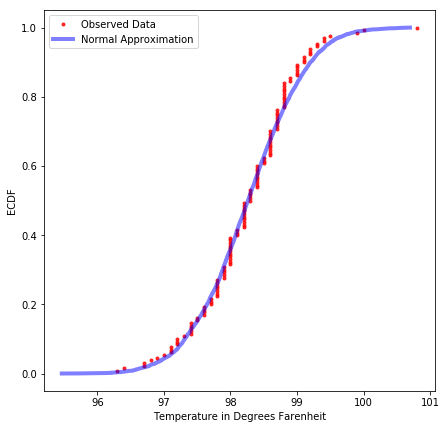

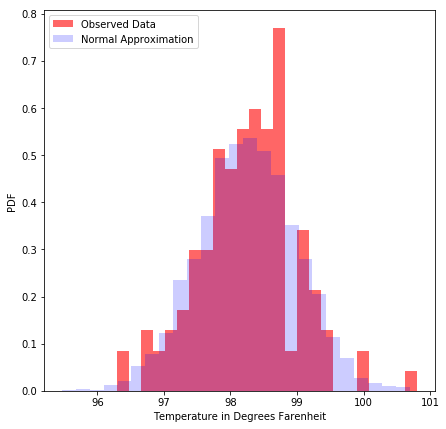

We test the null hypothesis that the data came from a normal distribution with a Shapiro Wilks test.
W value for data: 0.9865770936012268 , p value for alt hypothesis: 0.233174666762352
W value for simulated normal data: 0.9997571706771851 , p value for alt hypothesis: 0.8640196323394775
We fail to reject the null hypothesis that our data is normally distributed at an alpha of 0.05.
As a sanity check, we can compare the W and p values to our simulated normal data.


In [6]:
np.random.seed(50)

temps = df['temperature'].values
obs_x,obs_y = ecdf(temps)

norm_temps = np.random.normal(loc=np.mean(temps),scale=np.std(temps),size=5000)
norm_x,norm_y = ecdf(norm_temps)

plt.figure(figsize=[7,7])
plt.plot(obs_x,obs_y,marker='.',linestyle='none',color='red',alpha=0.8,label="Observed Data")
plt.plot(norm_x,norm_y,color='blue',linewidth=4,alpha = 0.5,label="Normal Approximation")
plt.xlabel("Temperature in Degrees Farenheit")
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=[7,7])
plt.hist(temps,color='red',alpha=0.6,bins=25,normed=True,label="Observed Data")
plt.hist(norm_temps,color='blue',alpha=0.2,bins=25,normed=True,label="Normal Approximation")
plt.xlabel("Temperature in Degrees Farenheit")
plt.ylabel('PDF')
plt.legend(loc='upper left')
plt.show()

shapiro_temp = shapiro(temps)
shapiro_norm = shapiro(norm_temps)

print('We test the null hypothesis that the data came from a normal distribution with a Shapiro Wilks test.')
print('W value for data: ' + str(shapiro_temp[0]),', p value for alt hypothesis: ' + str(shapiro_temp[1]) )
print('W value for simulated normal data: ' + str(shapiro_norm[0]),', p value for alt hypothesis: ' +
      str(shapiro_norm[1]))
print("We fail to reject the null hypothesis that our data is normally distributed at an alpha of 0.05.")
print("As a sanity check, we can compare the W and p values to our simulated normal data.")



### 2) Is the sample size large? Are the observations independent?

We have a sample size of 130, which is large enough (> 30) to consider less conservative hypothesis tests. Since we have a random sampling (without replacement) of individuals, we can assume that the measurements are independent.

In [7]:
n = len(temps)
print("Our sample size is " + str(n))

Our sample size is 130


### 3) Is the true population mean really 98.6 degrees F?

* Would you use a one-sample or two-sample test? Why?

We'll utilize a one-sample test, since we only have one sample group to draw from. If there was a control group that didn't experience some experimental intervention, we could use a two-sample test.

* In this situation, is it appropriate to use the  $t$  or  $z$ statistic?

We'll utilize $t$, since we are trying to make an assertion about the population of all humans and don't know the population's exact standard deviation. There is some wiggle room to potentially use $z$ with an approximation to the population standard deviation using degrees of freedom, but simply utilizing $t$ is a more conservative and therefore more believable choice.

* Now try using the other test. How is the result be different? Why?

We would expect the result of the $z$ test to give us a less conservative p value, since it can make stronger assumptions about the data. This means that our p value should be more extreme and the test should be more prone to rejecting the null hypothesis. Our example below confirms this.

In [8]:
t_results = ttest_1samp(temps,98.6)

print("We utilize a two sided t-test to test the null hypothesis that the true population is equal to 98.6.")
print("Since the claim is important and our data is small, we choose a conservative alpha of 0.01.")
print("We see that it is only " + str(t_results[1]*100) + "% likely to get a sample mean as low as the observed" +
    " one under the null hypothesis.")
print("We therefore reject the null at an alpha of 0.01.")

z_results = ztest(x1=temps,value=98.6,alternative='two-sided',ddof=1)
print("If we utilized a z-test, the observed mean would be " + str(z_results[1]*100) +'% likely under the null.')


We utilize a two sided t-test to test the null hypothesis that the true population is equal to 98.6.
Since the claim is important and our data is small, we choose a conservative alpha of 0.01.
We see that it is only 2.41063204156e-05% likely to get a sample mean as low as the observed one under the null hypothesis.
We therefore reject the null at an alpha of 0.01.
If we utilized a z-test, the observed mean would be 4.9021570141e-06% likely under the null.


### 4) Draw a small sample of size 10 from the data and repeat both tests.

* Which one is the correct one to use?

The t-test would definitely be the correct choice, because we have a small sample size (< 30) as well as not knowing the true population mean. Whereas our decision had wiggle room before, here $t$ is the only reasonable choice.

* What do you notice? What does this tell you about the difference in application of the  $t$  and  $z$  statistic?

The z-test is very likely to lead to false rejection of the null if used with a sample size that is too small. Using the variance of such a small sample in place of the population variance is clearly a sketchy choice with volatile results.



In [9]:
np.random.seed(50)
sample_temps = np.random.choice(temps,10)
print(sample_temps)

s_t_results = ttest_1samp(sample_temps,98.6)

print("With a t-test we are " + str(s_t_results[1]*100) + "% likely to get as extreme a sample mean " +
    "under the null hypothesis.")
s_z_results = ztest(x1=sample_temps,value=98.6,alternative='two-sided',ddof=1)
print("If we utilized a z-test, we would be " + str(s_z_results[1]*100) +'% likely.')

[ 97.3  98.6  98.1  98.1  98.6  97.8  96.8  97.7  98.   98.8]
With a t-test we are 1.13091385033% likely to get as extreme a sample mean under the null hypothesis.
If we utilized a z-test, we would be 0.150810669998% likely.


### 5) At what temperature should we consider a body temperature abnormal?

What we consider normal ought to depend a lot on our intended purpose for the measurement. Without a motivating application, we'll adopt the conventional threshold of the 95% confidence interval. With this as our yardstick, we can consider a temperature below 96.812 or above 99.686 degrees F to be abnormal.

In [46]:
#We multiply the critical value for for a 95% confidence interval by the standard error of the temperatures.
margin_of_error = norm.ppf(1-0.025)*np.std(temps,ddof=1)
conf_int = [np.mean(temps)-margin_of_error,np.mean(temps)+margin_of_error]
#We can compare the theoretical margin of error to the corresponding percentiles in the data
perc = np.percentile(temps,[2.5,97.5])
avg_dist = np.mean(np.abs(conf_int-perc))

print('The theoretical confidence interval varies about '+ str(avg_dist) + ' degrees F from the empirirical percentiles.')
print('We can consider a temperature below ' + str(conf_int[0]) + ' or above ' + str(conf_int[1]) + ' to be abnormal.')

The theoretical confidence interval varies about 0.149230769231 degrees F from the empirirical percentiles.
We can consider a temperature below 96.8122181854 or above 99.6862433531 to be abnormal.


### 6) Is there a significant difference between males and females in normal temperature?

* What test did you use and why?

I choose a Welch's t-test, which is a type of two sample t-test that accounts for unequal variance between the groups. This was applicable to our male and female temperature distributions.

* Write a story with your conclusion in the context of the original problem.

While the mean normal body temperature was long held to be 98.6$^{\circ}$F, our study reveals that:

1. This is not likely to be true of the general population. 
2. Mean normal body temperature varies noticeably by sex.

Females tend to have slightly higher mean normal body temperature than males, which suggests that many applications of the the overall mean would be better served by utilizing the gender-specific mean. Further research is needed to explain this tendency in body temperatures at a causal level.




Female sample size: 65
Male sample size: 65
Female variance: 0.737746448643
Male variance: 0.693359884183


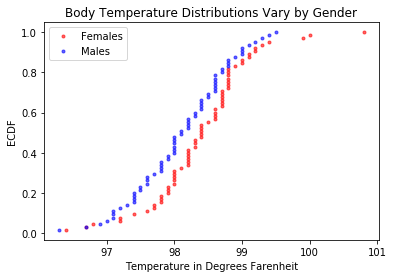

Let's check our intution with a t-test.
We run Welch's t-test with the null hypothesis that the true mean of each group is equal.
We select a p-value of 0.05 at which to reject the null.
We reject the null at a p value of 0.0239382641829.


In [42]:
f_temps = df[df['gender'] == 'F']['temperature'].values
m_temps = df[df['gender'] == 'M']['temperature'].values

print('Female sample size: ' + str(len(f_temps)))
print('Male sample size: ' + str(len(m_temps)))

print('Female variance: ' + str(np.std(f_temps)))
print('Male variance: ' + str(np.std(m_temps)))

f_x,f_y = ecdf(f_temps)
m_x,m_y = ecdf(m_temps)

plt.plot(f_x,f_y,marker='.',linestyle='none',color='red',alpha=0.6,label='Females')
plt.plot(m_x,m_y,marker='.',linestyle='none',color='blue',alpha=0.6,label='Males')
plt.title("Body Temperature Distributions Vary by Gender")
plt.xlabel("Temperature in Degrees Farenheit")
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

gender_results = ttest_ind(f_temps,m_temps,equal_var = False)

print("Let's check our intution with a t-test.")
print('We run Welch\'s t-test with the null hypothesis that the true mean of each group is equal.')
print('We select a p-value of 0.05 at which to reject the null.')
print('We reject the null at a p value of ' + str(gender_results[1]) +'.')